# Project3_10M_MovieLens Data Analysis
### Author : Farhana Alam

[k-Most popular movies of all time](#section_1)\
[k-Most popular movies for a particular year](#section_2)\
[k-Most popular movies for a particular season](#section_3)\
[Top k movies with the most ratings (presumably most popular) that have the lowest ratings](#section_4)\
[k-Most tagged movies of all time](#section_5)\
[k-Most commonly used tags for movies of all time](#section_6)\
[k-Most commonly used tags for the most common genre of the dataset](#section_7)\
[Finding the month of the year where movies get most tags based on tagging timestamp](#section_8)\
[For a particular genre which month is getting most tags](#section_9)

In [1]:
from pyspark.sql.types import *
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import pyspark.sql.functions as func
import sys
from IPython.display import Image
k = 10

In [2]:
# Creating a Spark session
spark = (SparkSession
        .builder
        .appName("Spark Project3 10M Movie Data Analysis")
        .getOrCreate())

In [ ]:
# Loading DataFiles with argv 
#movies_file = sys.argv[1]
#ratings_file = sys.argv[2]
#tags_file = sys.argv[3]

# Output CSV file path
#output_csv_path = sys.argv[4]

In [3]:
# Loading the samp_with_tag DataFiles
movies_file = "Documents/CS535/Project3/p3-cs535-team-07/10M_all/sample_with_tag/movie.csv"
ratings_file = "Documents/CS535/Project3/p3-cs535-team-07/10M_all/sample_with_tag/ratings.csv"
tags_file = "Documents/CS535/Project3/p3-cs535-team-07/10M_all/sample_with_tag/tag.csv"

# Output CSV file path
output_csv_path = "Documents/CS535/Project3/p3-cs535-team-07/10M_all/sample_with_tag_output_new"

In [4]:
#ratings datafiles to dataframes
ratings_df = (spark.read.format("csv")
    .option("sep", ",")
    .option("inferschema", "true")
    .option("header", "true")
    .option("samplingRatio", 0.1)  # Adjust the sampling ratio
    .load(ratings_file)
    .toDF("UserID", "MovieID", "Rating", "Rating_Timestamp"))

ratings_df.show(k)

+------+-------+------+----------------+
|UserID|MovieID|Rating|Rating_Timestamp|
+------+-------+------+----------------+
|     1|      1|     5|       978824268|
|     6|      1|     4|       978237008|
|     8|      1|     4|       978233496|
|     9|      1|     5|       978225952|
|    10|      1|     5|       978226474|
|    18|      1|     4|       978154768|
|    19|      1|     5|       978555994|
|    21|      1|     3|       978139347|
|    23|      1|     4|       978463614|
|    26|      1|     3|       978130703|
+------+-------+------+----------------+
only showing top 10 rows



In [5]:
#tags datafiles to dataframes
tags_df = (spark.read.format("csv")
    .option("sep", ",")
    .option("inferschema", "true")
    .option("header", "true")
    .option("samplingRatio", 0.1)  # Adjust the sampling ratio
    .load(tags_file)
    .toDF("UserID", "MovieID", "Tag", "Tag_Timestamp"))

tags_df.show(k)

+------+-------+---------+-------------+
|UserID|MovieID|      Tag|Tag_Timestamp|
+------+-------+---------+-------------+
|     1|      1|Excellent|    978824268|
|     6|      1|Excellent|    978237008|
|     8|      1|Excellent|    978233496|
|     9|      1|     Best|    978225952|
|    10|      1|     Best|    978226474|
|    18|      1|Excellent|    978154768|
|    19|      1|Excellent|    978555994|
|    21|      1|Excellent|    978139347|
|    23|      1|Excellent|    978463614|
|    26|      1|Excellent|    978130703|
+------+-------+---------+-------------+
only showing top 10 rows



In [6]:
#movies datafiles to dataframes
movies_df = (spark.read.format("csv")
      .option("sep", ",")
      .option("inferschema", "true")
      .option("header", "true")
      .option("samplingRatio", 0.1)  # Adjust the sampling ratio 
      .load(movies_file)
      .toDF("MovieID","Titles","Genres"))
movies_df.show(k)

+-------+--------------------+--------------------+
|MovieID|              Titles|              Genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Animation|Childre...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|        Comedy|Drama|
|      5|Father of the Bri...|              Comedy|
|      6|         Heat (1995)|Action|Crime|Thri...|
|      7|      Sabrina (1995)|      Comedy|Romance|
|      8| Tom and Huck (1995)|Adventure|Children's|
|      9| Sudden Death (1995)|              Action|
|     10|    GoldenEye (1995)|Action|Adventure|...|
+-------+--------------------+--------------------+
only showing top 10 rows



# Movies and Ratings

In [7]:
#INNER JOIN movies_df & ratings_df
moviesNratings = movies_df.join(ratings_df,movies_df.MovieID == ratings_df.MovieID, 'inner').select(
        movies_df.MovieID,movies_df.Titles,ratings_df.UserID,ratings_df.Rating, ratings_df.Rating_Timestamp)

moviesNratings.sort(col("UserID")).show(3)

+-------+-----------------+------+------+----------------+
|MovieID|           Titles|UserID|Rating|Rating_Timestamp|
+-------+-----------------+------+------+----------------+
|      1| Toy Story (1995)|     1|     5|       978824268|
|     48|Pocahontas (1995)|     1|     5|       978824351|
|     21|Get Shorty (1995)|     2|     1|       978299839|
+-------+-----------------+------+------+----------------+
only showing top 3 rows



<a id="section_1"></a>
## k-Most popular movies of all time
### Finding k most popular movies of all times assuming k=10
#### Considering rating timestamp, not the movie realease time

In [8]:
most_pop_movies = moviesNratings.groupBy("MovieID","Titles").avg("Rating").orderBy("avg(Rating)", ascending=False)

#writing to file
most_pop_movies.limit(k).write.csv(output_csv_path, header=True, mode="append")
most_pop_movies.show(k)

+-------+--------------------+------------------+
|MovieID|              Titles|       avg(Rating)|
+-------+--------------------+------------------+
|     53|     Lamerica (1994)|              4.75|
|     50|Usual Suspects, T...| 4.517106001121705|
|      1|    Toy Story (1995)| 4.146846413095811|
|     47|Seven (Se7en) (1995)| 4.106420404573439|
|     58|Postino, Il (The ...| 4.093812375249501|
|     29|City of Lost Chil...| 4.062034739454094|
|     28|   Persuasion (1995)| 4.055865921787709|
|     17|Sense and Sensibi...| 4.027544910179641|
|     41|  Richard III (1995)| 3.958677685950413|
|     36|Dead Man Walking ...|3.9579741379310347|
+-------+--------------------+------------------+
only showing top 10 rows



### Excel Verification
#### Please match the Movie Id of the Spark-code output and the screenshot from the Excel output

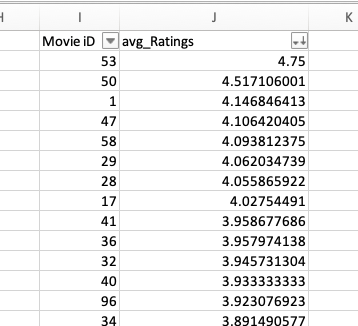

In [2]:
Image(filename="./Desktop/popular_movies.png")

<a id="section_2"></a>
## k-Most popular movies for a particular year
### Finding k most popular movies of all times assuming k=10, year = 2000
#### Considering rating timestamp, not the movie realease time

In [9]:
moviesNratings_withYear = moviesNratings.withColumn("Year", year(from_unixtime("Rating_Timestamp")))\
                               .select("MovieID","Titles","UserID","Rating","Year")\
                               .where(col("Year") == 2000)
moviesNratings_withYear.show(3)

+-------+----------------+------+------+----+
|MovieID|          Titles|UserID|Rating|Year|
+-------+----------------+------+------+----+
|      1|Toy Story (1995)|     6|     4|2000|
|      1|Toy Story (1995)|     8|     4|2000|
|      1|Toy Story (1995)|     9|     5|2000|
+-------+----------------+------+------+----+
only showing top 3 rows



In [10]:
top_10_pop_movies_of_a_year = moviesNratings_withYear.select("MovieID","Titles","Rating","Year")\
                               .groupBy("MovieID","Titles").avg("Rating").orderBy("avg(Rating)",ascending=False)
#writing to file
top_10_pop_movies_of_a_year.limit(k).write.csv(output_csv_path, header=True, mode="append")
top_10_pop_movies_of_a_year.show(k)

+-------+--------------------+-----------------+
|MovieID|              Titles|      avg(Rating)|
+-------+--------------------+-----------------+
|     53|     Lamerica (1994)|             4.75|
|     50|Usual Suspects, T...|4.525898842169409|
|     96|In the Bleak Midw...|              4.2|
|      1|    Toy Story (1995)|4.146924250127097|
|     47|Seven (Se7en) (1995)|4.110330992978937|
|     58|Postino, Il (The ...|4.098684210526316|
|     28|   Persuasion (1995)|4.096153846153846|
|     29|City of Lost Chil...|4.058171745152355|
|     17|Sense and Sensibi...|4.024901703800786|
|     41|  Richard III (1995)|3.990990990990991|
+-------+--------------------+-----------------+
only showing top 10 rows



<a id="section_3"></a>
## k-Most popular movies for a particular season
### Defining the season as (1: Winter, 2: Spring, 3: Summer, 4: Fall) 
### Assuming k=10, target_season = 3 (summer: month 7,8,9)
#### Considering rating timestamp, not the movie realease time

In [11]:
target_season = 3
moviesNratings_withMonth = moviesNratings.withColumn("Month", month(from_unixtime("Rating_Timestamp")))\
                               .select("MovieID","Titles","UserID","Rating","Month")\
                               .where((col("Month") >=(target_season * 3 - 2))&(col("Month")<=(target_season * 3)))

moviesNratings_withMonth.show(3)

+-------+----------------+------+------+-----+
|MovieID|          Titles|UserID|Rating|Month|
+-------+----------------+------+------+-----+
|      1|Toy Story (1995)|   173|     4|    7|
|      1|Toy Story (1995)|   193|     4|    7|
|      1|Toy Story (1995)|   308|     4|    7|
+-------+----------------+------+------+-----+
only showing top 3 rows



In [12]:
top_10_pop_movies_of_summer = moviesNratings_withMonth.select("MovieID","Titles","Rating","Month")\
                                  .groupBy("MovieID","Titles").avg("Rating").orderBy("avg(Rating)",ascending=False)
#writing to file
top_10_pop_movies_of_summer.limit(k).write.csv(output_csv_path, header=True, mode="append")
top_10_pop_movies_of_summer.show(k)

+-------+--------------------+------------------+
|MovieID|              Titles|       avg(Rating)|
+-------+--------------------+------------------+
|     53|     Lamerica (1994)|              4.75|
|     50|Usual Suspects, T...| 4.538109756097561|
|     47|Seven (Se7en) (1995)| 4.206310679611651|
|      1|    Toy Story (1995)| 4.155555555555556|
|     58|Postino, Il (The ...|             4.125|
|     29|City of Lost Chil...|4.0647482014388485|
|     17|Sense and Sensibi...|              4.02|
|     97|Hate (Haine, La) ...|               4.0|
|     82|Antonia's Line (A...|               4.0|
|     90|Journey of August...|               4.0|
+-------+--------------------+------------------+
only showing top 10 rows



<a id="section_4"></a>
## Top k movies with the most ratings (presumably most popular) that have the lowest ratings
#### Most rating counts, but less popular/lowest rating avg

In [13]:
# count of the ratings
moviesNratings_with_rating_counts = moviesNratings.groupBy("MovieID","Titles").count()                                                                 
moviesNratings_with_rating_counts.show(10)

+-------+--------------------+-----+
|MovieID|              Titles|count|
+-------+--------------------+-----+
|     55|      Georgia (1995)|   45|
|     87|Dunston Checks In...|   76|
|     88|  Black Sheep (1996)|  192|
|     17|Sense and Sensibi...|  835|
|     60|Indian in the Cup...|  357|
|     21|   Get Shorty (1995)| 1356|
|     61|Eye for an Eye (1...|   67|
|     94|Beautiful Girls (...|  182|
|     36|Dead Man Walking ...|  928|
|     67|     Two Bits (1995)|    4|
+-------+--------------------+-----+
only showing top 10 rows



In [14]:
# average of the ratings
moviesNratings_with_avg_rating = moviesNratings.groupBy("MovieID","Titles").avg("Rating")
moviesNratings_with_avg_rating = moviesNratings_with_avg_rating.select("MovieID","Titles",round("avg(Rating)",2).alias("avg_rating"))
moviesNratings_with_avg_rating.show(k)

+-------+--------------------+----------+
|MovieID|              Titles|avg_rating|
+-------+--------------------+----------+
|     55|      Georgia (1995)|      3.07|
|     87|Dunston Checks In...|      2.21|
|     88|  Black Sheep (1996)|      2.94|
|     17|Sense and Sensibi...|      4.03|
|     60|Indian in the Cup...|      3.21|
|     21|   Get Shorty (1995)|      3.62|
|     61|Eye for an Eye (1...|       3.0|
|     94|Beautiful Girls (...|      3.73|
|     36|Dead Man Walking ...|      3.96|
|     67|     Two Bits (1995)|      3.25|
+-------+--------------------+----------+
only showing top 10 rows



In [15]:
# Joining movie rating-count and average-rating
moviesNratings_rating_counts_with_avgRatings = moviesNratings_with_rating_counts.join(moviesNratings_with_avg_rating, 
                    moviesNratings_with_rating_counts.MovieID == moviesNratings_with_avg_rating.MovieID)\
                     .orderBy("count", ascending=False)\
                     .select(moviesNratings_with_rating_counts.MovieID,
                             moviesNratings_with_rating_counts.Titles,"count","avg_rating")
moviesNratings_rating_counts_with_avgRatings.show(k)

+-------+--------------------+-----+----------+
|MovieID|              Titles|count|avg_rating|
+-------+--------------------+-----+----------+
|      1|    Toy Story (1995)| 2077|      4.15|
|     50|Usual Suspects, T...| 1783|      4.52|
|     34|         Babe (1995)| 1751|      3.89|
|     32|Twelve Monkeys (1...| 1511|      3.95|
|     39|     Clueless (1995)| 1362|      3.62|
|     21|   Get Shorty (1995)| 1356|      3.62|
|     47|Seven (Se7en) (1995)| 1137|      4.11|
|     11|American Presiden...| 1033|      3.79|
|     25|Leaving Las Vegas...|  980|      3.65|
|      6|         Heat (1995)|  940|      3.88|
+-------+--------------------+-----+----------+
only showing top 10 rows



In [16]:
#Calculating the result
movies_hcount_lrating = moviesNratings_rating_counts_with_avgRatings.orderBy(['count', 'avg_rating'], ascending=[False, True])

#writing to file
movies_hcount_lrating.limit(k).write.csv(output_csv_path, header=True, mode="append")
movies_hcount_lrating.show(k)

+-------+--------------------+-----+----------+
|MovieID|              Titles|count|avg_rating|
+-------+--------------------+-----+----------+
|      1|    Toy Story (1995)| 2077|      4.15|
|     50|Usual Suspects, T...| 1783|      4.52|
|     34|         Babe (1995)| 1751|      3.89|
|     32|Twelve Monkeys (1...| 1511|      3.95|
|     39|     Clueless (1995)| 1362|      3.62|
|     21|   Get Shorty (1995)| 1356|      3.62|
|     47|Seven (Se7en) (1995)| 1137|      4.11|
|     11|American Presiden...| 1033|      3.79|
|     25|Leaving Las Vegas...|  980|      3.65|
|      6|         Heat (1995)|  940|      3.88|
+-------+--------------------+-----+----------+
only showing top 10 rows



# Movies and Tags

In [17]:
#INNER JOIN movies_df & tags_df
moviesNtags = movies_df.join(tags_df,movies_df.MovieID == tags_df.MovieID, 'inner').select(
        movies_df.MovieID,movies_df.Titles,movies_df.Genres,tags_df.UserID,tags_df.Tag, tags_df.Tag_Timestamp)\
           .orderBy("UserID", ascending=True)

moviesNtags.show(13)

+-------+--------------------+--------------------+------+---------+-------------+
|MovieID|              Titles|              Genres|UserID|      Tag|Tag_Timestamp|
+-------+--------------------+--------------------+------+---------+-------------+
|      1|    Toy Story (1995)|Animation|Childre...|     1|Excellent|    978824268|
|     48|   Pocahontas (1995)|Animation|Childre...|     1|   Horror|    978824351|
|     21|   Get Shorty (1995)| Action|Comedy|Drama|     2|   Horror|    978299839|
|     95| Broken Arrow (1996)|     Action|Thriller|     2|   Normal|    978300143|
|      6|         Heat (1995)|Action|Crime|Thri...|     5|     Poor|    978245916|
|     24|       Powder (1995)|        Drama|Sci-Fi|     5|   Horror|    978242934|
|     16|       Casino (1995)|      Drama|Thriller|     5|   Satire|    978245645|
|     29|City of Lost Chil...|    Adventure|Sci-Fi|     5|   Satire|    978245065|
|     32|Twelve Monkeys (1...|        Drama|Sci-Fi|     5|   Normal|    978244962|
|   

<a id="section_5"></a>
## k-Most tagged movies of all time
### Finding k most tagged movies of all times assuming k=10
#### Considering tagging timestamp, not the movie realease time

In [18]:
most_tagged_movies = moviesNtags.groupBy("MovieID","Titles").count().orderBy("count", ascending=False)

#writing to file
most_tagged_movies.limit(k).write.csv(output_csv_path, header=True, mode="append")
most_tagged_movies.show(k)

+-------+--------------------+-----+
|MovieID|              Titles|count|
+-------+--------------------+-----+
|      1|    Toy Story (1995)|   36|
|     34|         Babe (1995)|   30|
|     50|Usual Suspects, T...|   28|
|     47|Seven (Se7en) (1995)|   27|
|     32|Twelve Monkeys (1...|   25|
|     21|   Get Shorty (1995)|   21|
|     17|Sense and Sensibi...|   21|
|     39|     Clueless (1995)|   18|
|     36|Dead Man Walking ...|   16|
|      2|      Jumanji (1995)|   16|
+-------+--------------------+-----+
only showing top 10 rows



### Excel Verification
#### Please match the Movie Id of the Spark-code output and the screenshot from the Excel output

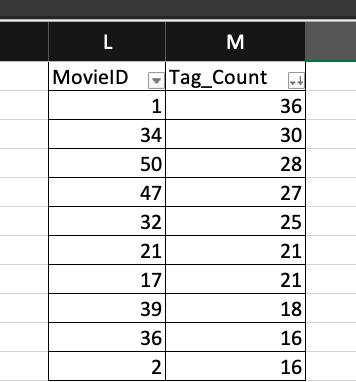

In [3]:
Image(filename="./Desktop/Tag_counts.png")

<a id="section_6"></a>
## k-Most commonly used tags for movies of all time
### Finding k most commomly used tags for movies of all times, assuming k=10

In [19]:
most_used_tags = moviesNtags.groupBy("Tag").count().orderBy("count", ascending=False)

#writing to file
most_used_tags.limit(k).write.csv(output_csv_path, header=True, mode="append")
most_used_tags.show(k)

+---------+-----+
|      Tag|count|
+---------+-----+
|      Bad|   93|
|   Satire|   79|
|   Normal|   71|
|   Horror|   64|
|     Poor|   61|
|Excellent|   58|
|   Action|   24|
|       PG|   17|
|     Best|   16|
|     Good|   13|
+---------+-----+
only showing top 10 rows



### Excel Verification
#### Please match the Movie Id of the Spark-code output and the screenshot from the Excel output

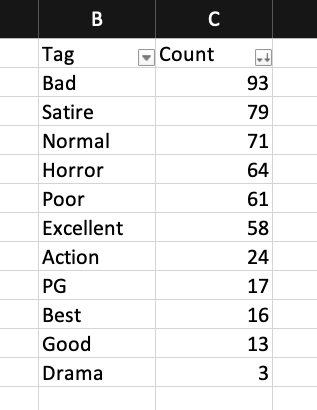

In [4]:
Image(filename="./Desktop/Tags.png")

<a id="section_7"></a>
## k-Most commonly used tags for the most common genre of the dataset
### Finding the most common genre of the dataset,then finding the k-most common tags for that genre, assuming k=10

In [20]:
#Exploding Genre
movie_tagsNgenre = moviesNtags.withColumn("Genre", explode(split(trim(col("Genres")), "\\|"))).drop('Genres')
movie_tagsNgenre.show(5)

+-------+-----------------+------+---------+-------------+----------+
|MovieID|           Titles|UserID|      Tag|Tag_Timestamp|     Genre|
+-------+-----------------+------+---------+-------------+----------+
|      1| Toy Story (1995)|     1|Excellent|    978824268| Animation|
|      1| Toy Story (1995)|     1|Excellent|    978824268|Children's|
|      1| Toy Story (1995)|     1|Excellent|    978824268|    Comedy|
|     48|Pocahontas (1995)|     1|   Horror|    978824351| Animation|
|     48|Pocahontas (1995)|     1|   Horror|    978824351|Children's|
+-------+-----------------+------+---------+-------------+----------+
only showing top 5 rows



In [21]:
#Finding the most common genre which is our targer genre
genre_counts = movie_tagsNgenre.groupBy("Genre").count().orderBy("count", ascending=False)
target_genre = genre_counts.collect()[0][0]
genre_counts.show(25)

+----------+-----+
|     Genre|count|
+----------+-----+
|     Drama|  220|
|    Comedy|  176|
|  Thriller|  137|
|Children's|  116|
|   Romance|  114|
|     Crime|   88|
|    Action|   87|
| Adventure|   58|
| Animation|   54|
|    Sci-Fi|   51|
|   Fantasy|   26|
|   Musical|   19|
|    Horror|   17|
|       War|    2|
+----------+-----+



In [22]:
# Calculating the count of each tags for each genre
r_movie_tagsNgenre = movie_tagsNgenre.groupBy("Genre","Tag").count().orderBy(['count','Genre'], ascending=[False, False])
r_movie_tagsNgenre.show(5)

+--------+------+-----+
|   Genre|   Tag|count|
+--------+------+-----+
|   Drama|Satire|   45|
|   Drama|   Bad|   44|
|   Drama|Normal|   38|
|Thriller|   Bad|   33|
|   Drama|Horror|   32|
+--------+------+-----+
only showing top 5 rows



In [23]:
tags_for_target_genre = movie_tagsNgenre.where(col("Genre")== target_genre)

#writing to file
tags_for_target_genre.limit(k).write.csv(output_csv_path, header=True, mode="append")
tags_for_target_genre.show(k)

+-------+--------------------+------+------+-------------+-----+
|MovieID|              Titles|UserID|   Tag|Tag_Timestamp|Genre|
+-------+--------------------+------+------+-------------+-----+
|     21|   Get Shorty (1995)|     2|Horror|    978299839|Drama|
|     16|       Casino (1995)|     5|Satire|    978245645|Drama|
|     24|       Powder (1995)|     5|Horror|    978242934|Drama|
|     32|Twelve Monkeys (1...|     5|Normal|    978244962|Drama|
|     34|         Babe (1995)|     5|Normal|    978244603|Drama|
|     36|Dead Man Walking ...|     5|   Bad|    978244808|Drama|
|     41|  Richard III (1995)|     5|   Bad|    978244692|Drama|
|     17|Sense and Sensibi...|     6|Horror|    978236383|Drama|
|     34|         Babe (1995)|     6|Satire|    978237444|Drama|
|      4|Waiting to Exhale...|     8|  Good|    978232203|Drama|
+-------+--------------------+------+------+-------------+-----+
only showing top 10 rows



<a id="section_8"></a>
## Finding the month of the year where movies get most tags based on tagging timestamp

In [24]:
moviesNtags_withMonth = moviesNtags.withColumn("Month", month(from_unixtime("Tag_Timestamp")))\
                               .select("MovieID","Titles","Tag","Month")
moviesNtags_withMonth.show(15)

+-------+--------------------+---------+-----+
|MovieID|              Titles|      Tag|Month|
+-------+--------------------+---------+-----+
|      1|    Toy Story (1995)|Excellent|    1|
|     48|   Pocahontas (1995)|   Horror|    1|
|     21|   Get Shorty (1995)|   Horror|   12|
|     95| Broken Arrow (1996)|   Normal|   12|
|     24|       Powder (1995)|   Horror|   12|
|      6|         Heat (1995)|     Poor|   12|
|     16|       Casino (1995)|   Satire|   12|
|     29|City of Lost Chil...|   Satire|   12|
|     32|Twelve Monkeys (1...|   Normal|   12|
|     34|         Babe (1995)|   Normal|   12|
|     36|Dead Man Walking ...|      Bad|   12|
|     39|     Clueless (1995)|      Bad|   12|
|     41|  Richard III (1995)|      Bad|   12|
|     47|Seven (Se7en) (1995)|      Bad|   12|
|     50|Usual Suspects, T...|      Bad|   12|
+-------+--------------------+---------+-----+
only showing top 15 rows



In [25]:
moviesNtags_withMonth = moviesNtags_withMonth.groupBy("Month").count().orderBy('count',ascending = False)

#writing to file
moviesNtags_withMonth.limit(12).write.csv(output_csv_path, header=True, mode="append")
moviesNtags_withMonth.show(12)

+-----+-----+
|Month|count|
+-----+-----+
|   12|  404|
|    1|   57|
|    6|   15|
|    4|    8|
|    2|    8|
|    3|    2|
|    5|    2|
|    7|    2|
|   10|    1|
+-----+-----+



<a id="section_9"></a>
## For a particular genre which month is getting most tags
### selecting genre = Thriller

In [26]:
moviesNtags_Mn_Gn = moviesNtags.withColumn("Month", month(from_unixtime("Tag_Timestamp")))\
                               .select("MovieID","Titles","Genres","Tag","Month").where(col('Genres') == 'Thriller')
moviesNtags_Mn_Gn.show(k)

+-------+-----------------+--------+------+-----+
|MovieID|           Titles|  Genres|   Tag|Month|
+-------+-----------------+--------+------+-----+
|     23| Assassins (1995)|Thriller|Horror|   12|
|     18|Four Rooms (1995)|Thriller|Satire|   12|
+-------+-----------------+--------+------+-----+



In [27]:
moviesNtags_Mn_Gn = moviesNtags_Mn_Gn.groupBy("Month").count().orderBy('count',ascending = False)

#writing to file
moviesNtags_Mn_Gn.limit(12).write.csv(output_csv_path, header=True, mode="append")
moviesNtags_Mn_Gn.show(12)

+-----+-----+
|Month|count|
+-----+-----+
|   12|    2|
+-----+-----+



In [28]:
#stopping spark
spark.stop()